In [1]:
# importing necessary libraries
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,accuracy_score
from xgboost import XGBRegressor

In [2]:
# reading train data
df_train=pd.read_csv('../input/titanic/train.csv')
df_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [3]:
# reading test data
df_test=pd.read_csv('../input/titanic/test.csv')
df_test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

#  Understanding the Data

In [4]:
print(f"Test data shape {df_test.shape} ")
print(f"Train data shape {df_train.shape}")

Test data shape (418, 11) 
Train data shape (891, 12)


In [5]:
# information related to the data
print("Train data")
display(df_train.info())
print("Test data")
display(df_test.info())

Train data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

Test data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


None

In [6]:
# checking statistical data related to info
print("Train Data")
display(df_train.describe())
print("Test Data")
display(df_test.describe())

Train Data


PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

Test Data


PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200

In [7]:
pandas_profiling.ProfileReport(df_train)

/opt/conda/lib/python3.7/site-packages/IPython/core/display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


# Visualizing

In [8]:
def plot_bar(df,feat_x,feat_y,normalize=True):
    """ Plot with vertical bars of the requested dataframe and features"""
    
    ct = pd.crosstab(df[feat_x], df[feat_y])
    if normalize == True:
        ct = ct.div(ct.sum(axis=1), axis=0)
    return ct.plot(kind='bar', stacked=True)

In [9]:
plot_bar(df_train,'Pclass','Survived')
plt.title('Pclass VS Survived')

Text(0.5, 1.0, 'Pclass VS Survived')

In [10]:
plot_bar(df_train,'Sex','Survived')
plt.title('Sex VS Survived')

Text(0.5, 1.0, 'Sex VS Survived')

# Cleaning the data

In [11]:
# checking for missing values
print("Missing values  in the training data")
display(df_train.isnull().sum())
print("Missing values in the test data")
display(df_test.isnull().sum())

Missing values  in the training data


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing values in the test data


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [12]:
# checking for percent of missing values in the data
print("Train data")
display(df_train.isnull().sum()/len(df_train))
print("Test data")
display(df_test.isnull().sum()/len(df_test))

Train data


PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

Test data


PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64

In [13]:
# cabin data is missing in both the datasets at a considerable amount
# so we can drop the column
df_test.drop('Cabin',axis=1,inplace=True)
df_train.drop('Cabin',axis=1,inplace=True)

display(df_test.head())
display(df_train.head())

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Embarked  
0  34.5      0      0   330911   7.8292        Q  
1  47.0      1      0   363272   7.0000        S  
2  62.0      0      0   240276   9.6875        Q  
3  27.0      0      0   315154   8.6625        S  
4  22.0      1      1  3101298  12.2875        S

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

In [14]:
# we can replace the missing values with the medai for age
df_test['Age']=df_test['Age'].fillna(df_test['Age'].median())
df_train['Age']=df_train['Age'].fillna(df_train['Age'].median())

In [15]:
# for embarked values , check  which is the place most people embarked from
display(df_train.loc[df_train['Embarked'].isnull()])
df_train['Embarked'].value_counts(normalize=True)

PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Embarked  
61   female  38.0      0      0  113572  80.0      NaN  
829  female  62.0      0      0  113572  80.0      NaN

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

In [16]:
# replacing the missing embarked values with 'S'
df_train['Embarked']=df_train['Embarked'].fillna('S')

> You  dont always have to find the missing values from the data , if you search wikipedia for the titanic data , you can find that these people 
whose embarked values are missing embarked from Southampton.
Always keep in mind that Data Scince is not always about coding , its sometimes about research

In [17]:
# for the missing fare value, simply replace it with the median
df_test['Fare']=df_test.fillna(df_test['Fare'].median())

In [18]:
# printing missing values in the datasets
print("Test data")
display(df_test.isnull().sum())
print("Train data")
display(df_train.isnull().sum())

Test data


PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Train data


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [19]:
# finding co-relatoin between survivors
plt.figure(figsize=(15,7))
sns.heatmap(df_train.corr(),annot=True,cmap='YlGnBu')

In [20]:
# from the heatmap we cann find that survival is highly corealed to Pclass and Fare

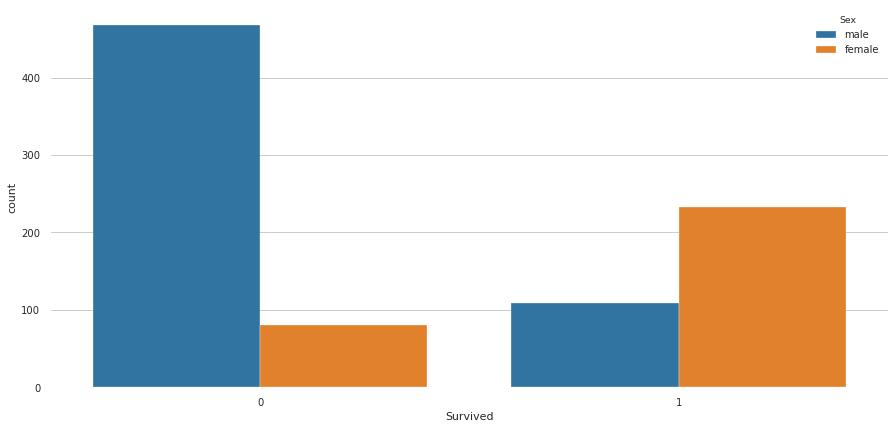

In [21]:
plt.figure(figsize=(15,7))
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=df_train)

In [22]:
plt.figure(figsize=(15,7))
sns.countplot(x='Survived',hue='Pclass',data=df_train,palette='rainbow')

# Categorical Values to Numerical values

In [23]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
df_train['Embarked']= label_encoder.fit_transform(df_train['Embarked']) 
df_train['Sex']= label_encoder.fit_transform(df_train['Sex'])
df_test['Embarked']= label_encoder.fit_transform(df_test['Embarked']) 
df_test['Sex']= label_encoder.fit_transform(df_test['Sex'])

In [24]:
df_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare  Embarked  
0         A/5 21171   7.2500         2  
1          PC 17599  71.2833         0  
2  STON/O2. 3101282   7.9250         2  
3            113803  53.1000         2  
4            373450   8.0500         2

In [25]:
# dropping non-usefull columns
df_test.drop(['Name','Ticket'],axis=1,inplace=True)
df_train.drop(['Name','Ticket'],axis=1,inplace=True)

In [26]:
df_test.head()

PassengerId  Pclass  Sex   Age  SibSp  Parch Fare  Embarked
0          892       3    1  34.5      0      0  892         1
1          893       3    0  47.0      1      0  893         2
2          894       2    1  62.0      0      0  894         1
3          895       3    1  27.0      0      0  895         2
4          896       3    0  22.0      1      1  896         2

# Scaling

In [27]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
df_train[['Age','Fare']]=scaler.fit_transform(df_train[['Age','Fare']])
df_test[['Age','Fare']]=scaler.fit_transform(df_test[['Age','Fare']])

In [28]:
df_train.head()

PassengerId  Survived  Pclass  Sex       Age  SibSp  Parch      Fare  \
0            1         0       3    1 -0.565736      1      0 -0.502445   
1            2         1       1    0  0.663861      1      0  0.786845   
2            3         1       3    0 -0.258337      0      0 -0.488854   
3            4         1       1    0  0.433312      1      0  0.420730   
4            5         0       3    1  0.433312      0      0 -0.486337   

   Embarked  
0         2  
1         0  
2         2  
3         2  
4         2

# Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

X_train = df_train.drop(['Survived','PassengerId'], axis=1)
y_train = df_train["Survived"]
X_test  = df_test.drop("PassengerId", axis=1)
X_train.shape, y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

In [30]:
LR=LogisticRegression(max_iter=1000,random_state=1)
LR.fit(X_train,y_train)

# making predictions
y_pred=LR.predict(X_test)

In [31]:
# finding accuracy
print("Accuracy:",round(LR.score(X_train, y_train)*100,2))

Accuracy: 80.13


In [32]:
dfs = pd.read_csv("../input/titanic/gender_submission.csv")
file = {"PassengerId":dfs["PassengerId"],"Survived":y_pred}
file = pd.DataFrame(file)

file.to_csv("submission_Lr.csv",index=False)

# Decision Tree


In [33]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
pred = clf.predict(X_test)


print("Accuracy",round(clf.score(X_train,y_train)*100,2))


dfs = pd.read_csv("../input/titanic/gender_submission.csv")
file = {"PassengerId":dfs["PassengerId"],"Survived":pred}
file = pd.DataFrame(file)

file.to_csv("submission_dt.csv",index=False)

Accuracy 97.98


# Random Forest

In [34]:
train_x,val_x,train_y,val_y=train_test_split(X_train,y_train)

In [35]:
from sklearn.ensemble import RandomForestRegressor

#Create a Gaussian Classifier
clf=RandomForestRegressor(n_estimators=100)

clf.fit(train_x,train_y)
pred=clf.predict(val_x)

print("MEA",mean_absolute_error(pred,val_y))
print("RMSE",mean_squared_error(pred,val_y,squared=False))

MEA 0.22319205402221098
RMSE 0.36555160005001286


In [36]:
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

pred=clf.predict(X_test)

# dfs = pd.read_csv("../input/titanic/gender_submission.csv")
file1 = {"PassengerId":dfs["PassengerId"],"Survived":pred}
file1 = pd.DataFrame(file)

file.to_csv("submission_Rf.csv",index=False)

In [37]:
file.head()

PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         1
4          896         1

In [38]:
clf.score(X_train, y_train)
random_forest = round(clf.score(X_train, y_train) * 100, 2)
random_forest

88.15

In [39]:
file.head()

PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         1
4          896         1